#### Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Import stock price data stored in matrix (50 No. stocks, 500 No. trading days)

In [4]:

# Specify the file path
file_path = 'prices.txt'
SP_List = []
# Open the file in read mode ('r')
with open(file_path, 'r') as file:
    # Read the entire file content
    SP_line = file.readlines()
    for i in SP_line:
        SP_List.append(list(map(float, i.split())))

SP_matrix = np.array(SP_List)
SP_matrix = np.transpose(SP_matrix)
print(SP_matrix, SP_matrix.shape)


[[13.46 13.48 13.47 ... 13.69 13.55 13.4 ]
 [71.65 72.1  72.35 ... 67.83 67.61 67.33]
 [48.46 48.52 48.48 ... 46.66 46.73 46.72]
 ...
 [36.22 36.27 36.39 ... 33.6  33.79 33.82]
 [49.   48.84 48.56 ... 33.75 33.53 33.4 ]
 [56.09 56.08 55.9  ... 54.22 54.5  55.01]] (50, 500)


#### check price stock characteristic

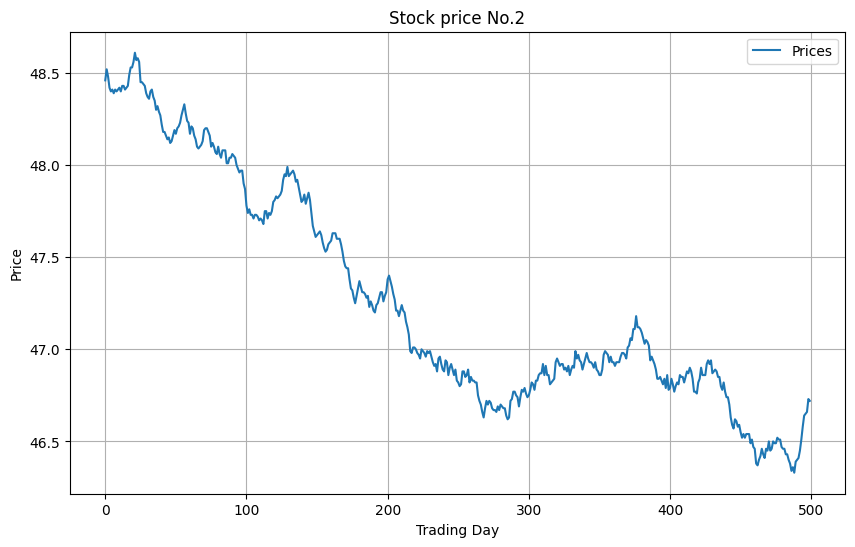

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(SP_matrix[2,:], label='Prices')
plt.title('Stock price No.2')
plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('stock price no.2.png')
plt.show()

#### EMA 12 days & EMA 26 for each stock

#### create matrix to store EMA 12 & EMA 26 for each stock 

In [25]:
EMA_12 = np.zeros((50,500)) ### create matrix 50 x 500 with zero values
EMA_26 = np.zeros((50,500))

##### Set Parameters and Calculating Function EMA 12 and EMA 26

In [28]:
# EMA 12 Function
def calculate_ema_12(prices, N=12):  ## time period 12, so N=12
    alpha = 2 / (N + 1)
    EMA = []
    EMA.append(prices[0])  # Start with the first price as initial EMA  EMA(t=0) = P(t=0)
    for i in range(1, len(prices)):
        EMA_val = alpha * prices[i] + (1 - alpha) * EMA[i - 1]  #EMA(t) = α * P(t) + (1-α) * EMA(t-1)
        EMA.append(EMA_val)
    return np.array(EMA)
# EMA 26 Function
def calculate_ema_26(prices, N=26):  ## time period 12, so N=26
    alpha = 2 / (N + 1)
    EMA = []
    EMA.append(prices[0])  # Start with the first price as initial EMA  EMA(t=0) = P(t=0)
    for i in range(1, len(prices)):
        EMA_val = alpha * prices[i] + (1 - alpha) * EMA[i - 1]  #EMA(t) = α * P(t) + (1-α) * EMA(t-1)
        EMA.append(EMA_val)
    return np.array(EMA)

#### Loop for calculating EMA 12 and EMA 26 for 50 stocks, and store into EMA_12 and EMA_26 matrix 

In [39]:
for i in range(SP_matrix.shape[0]): # loop for 50 stocks
    EMA_12[i,:] = calculate_ema_12(SP_matrix[i,:])
    EMA_26[i,:] = calculate_ema_26(SP_matrix[i,:])
print(EMA_12)
print("\n")
print(EMA_26)

[[13.46       13.46307692 13.46414201 ... 13.56658162 13.5640306
  13.53879512]
 [71.65       71.71923077 71.81627219 ... 67.2890457  67.33842329
  67.3371274 ]
 [48.46       48.46923077 48.47088757 ... 46.52870218 46.55967107
  46.58433706]
 ...
 [36.22       36.22769231 36.25266272 ... 33.64186695 33.66465665
  33.68855563]
 [49.         48.97538462 48.91147929 ... 33.59504043 33.58503421
  33.55656741]
 [56.09       56.08846154 56.05946746 ... 54.0920213  54.15478725
  54.28635845]]


[[13.46       13.46148148 13.46211248 ... 13.46979628 13.4757373
  13.47012713]
 [71.65       71.68333333 71.73271605 ... 67.13368361 67.16896631
  67.18089473]
 [48.46       48.46444444 48.46559671 ... 46.49390263 46.51139132
  46.52684382]
 ...
 [36.22       36.2237037  36.23602195 ... 33.7531845  33.75591158
  33.76065887]
 [49.         48.98814815 48.95643347 ... 33.50791599 33.50955184
  33.50143689]
 [56.09       56.08925926 56.07524005 ... 54.26695988 54.28422211
  54.33798344]]


#### MACD Trading strategy

MACD is using EMA crossover between shorter and longer period by specifying date

Shorter EMA: EMA_12 

Longer EMA: EMA_26 

Buying Signal: When EMA_12 crosses EMA_26 up 

Selling SIgnal When EMA_12 crosses EMA_26 down

#### Plot EMA12 vs EMA26 vs Stock Price (MACD)

#### Plot 50 stocks

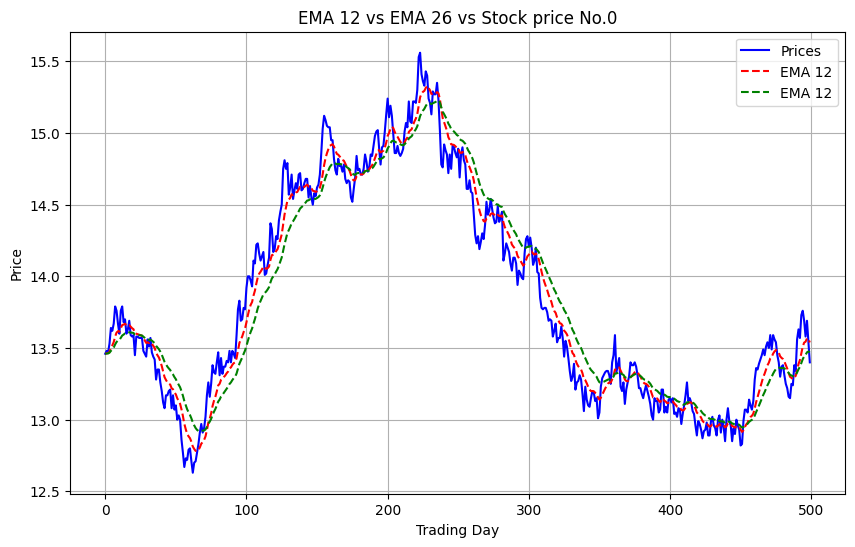

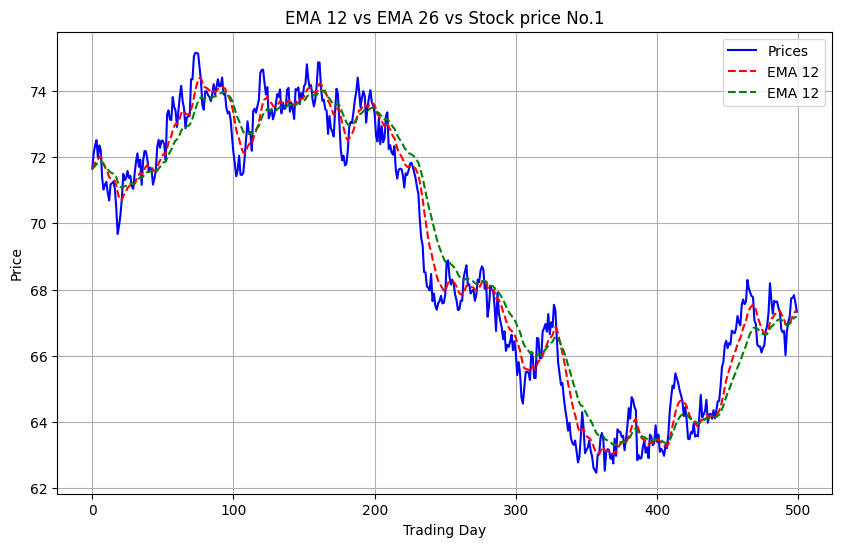

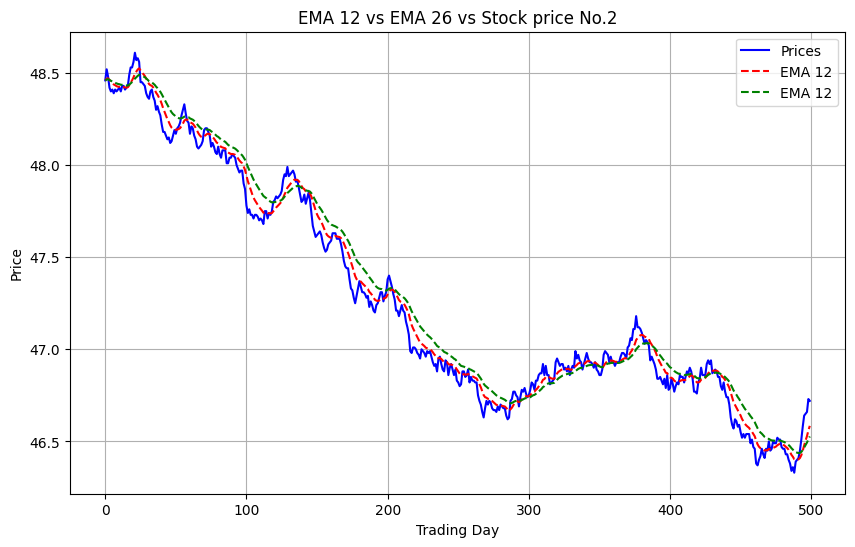

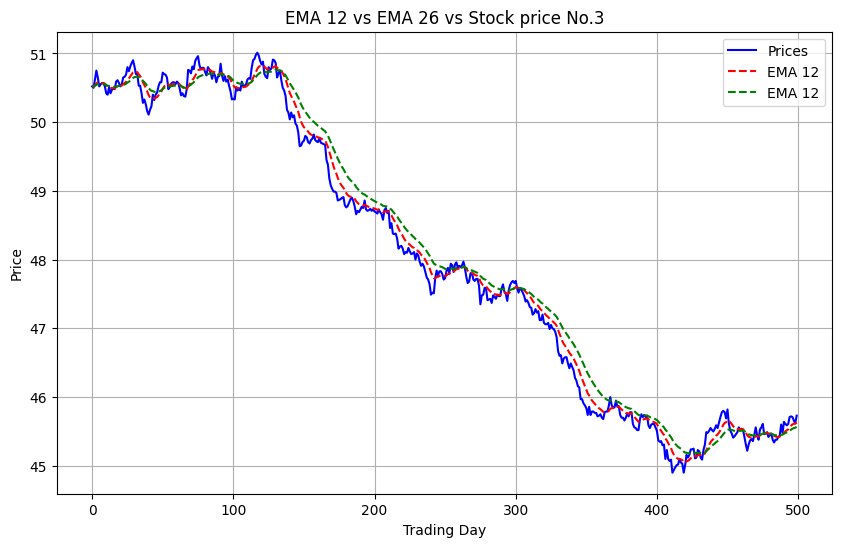

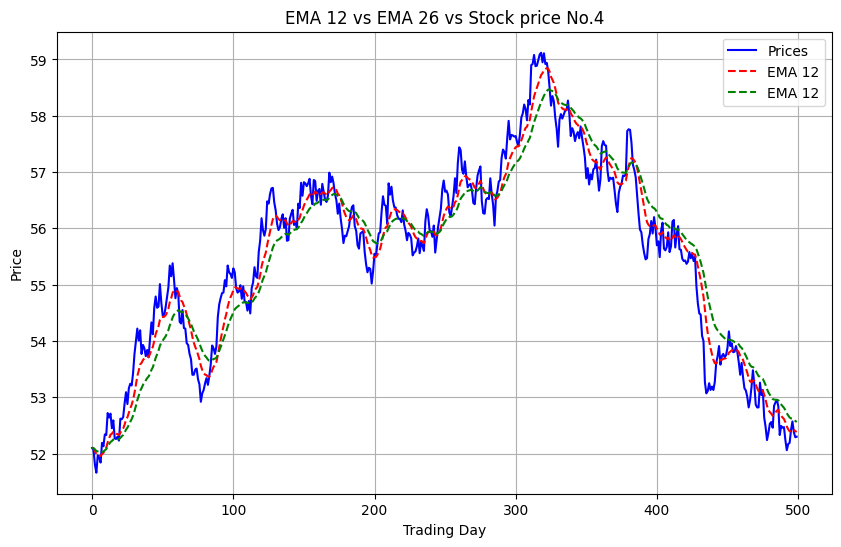

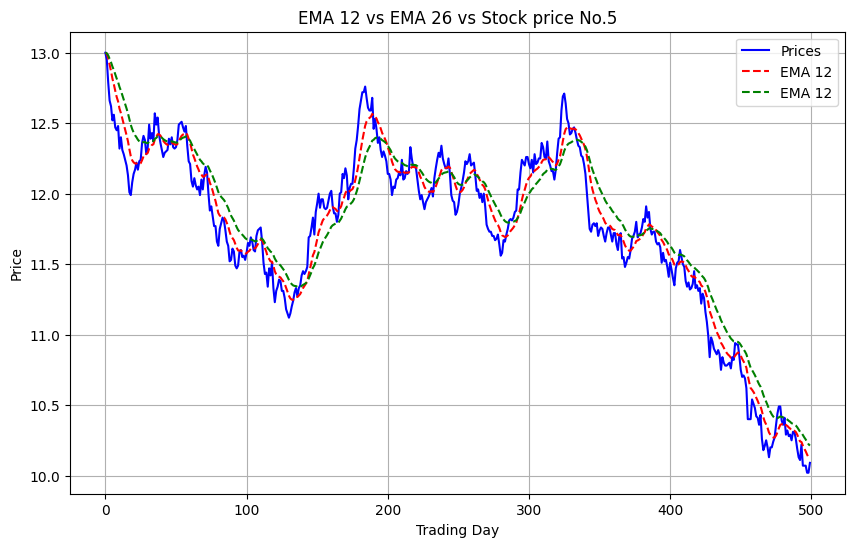

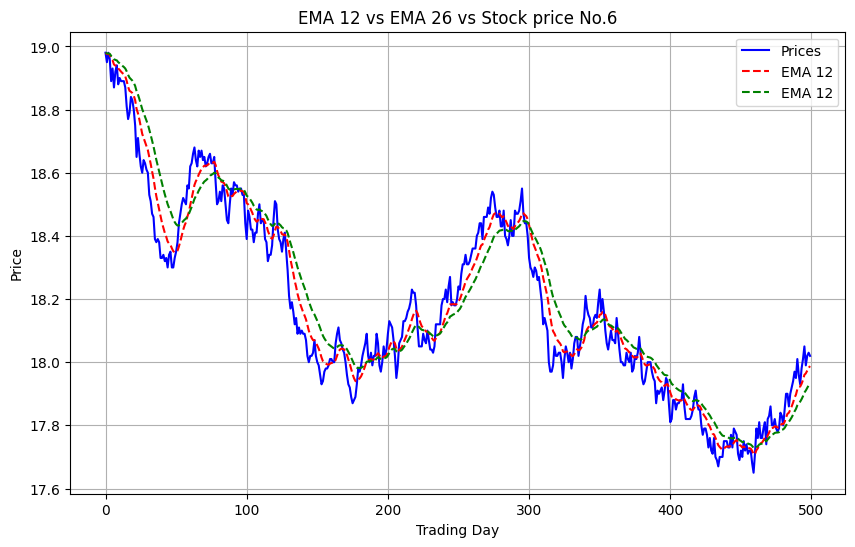

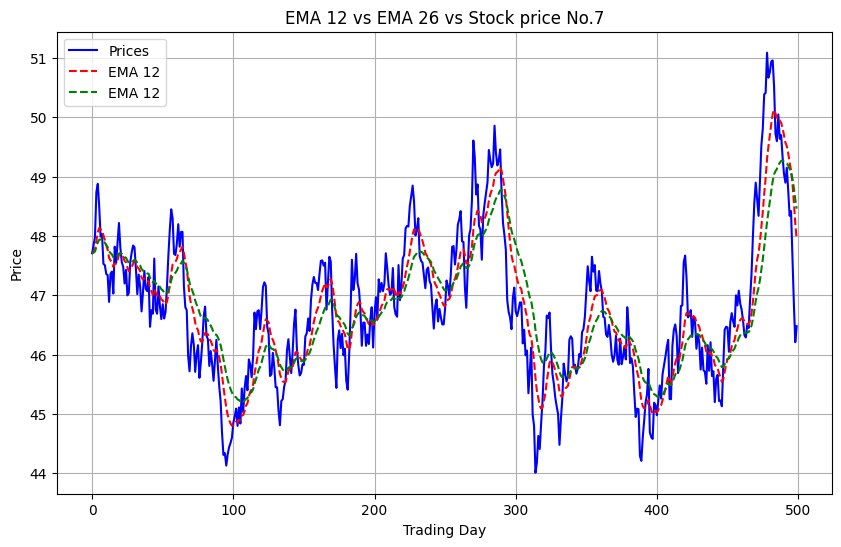

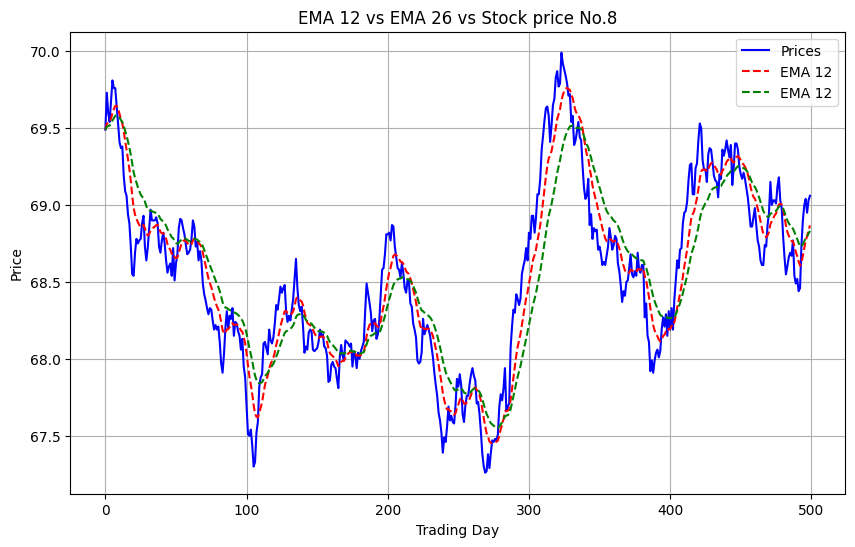

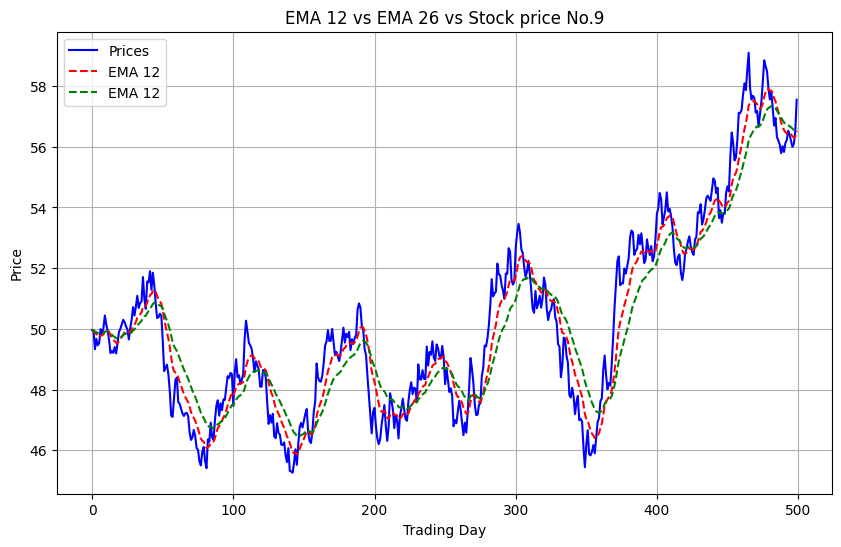

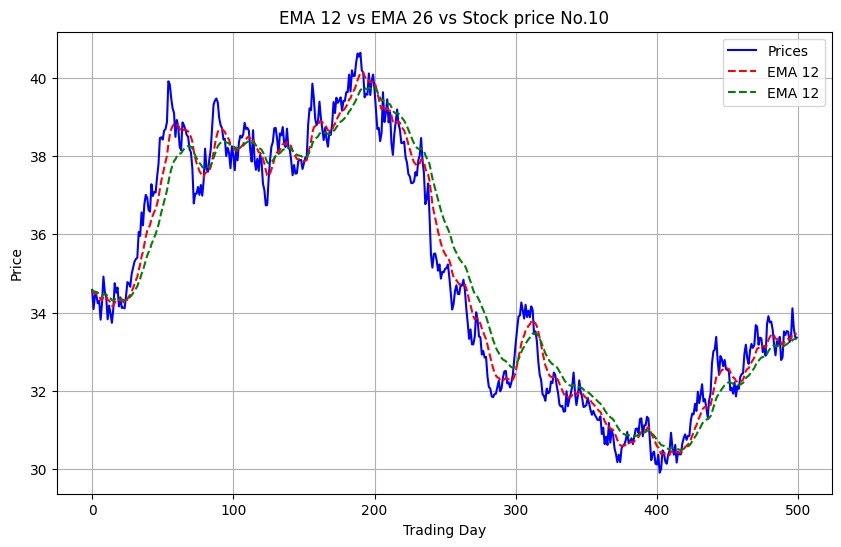

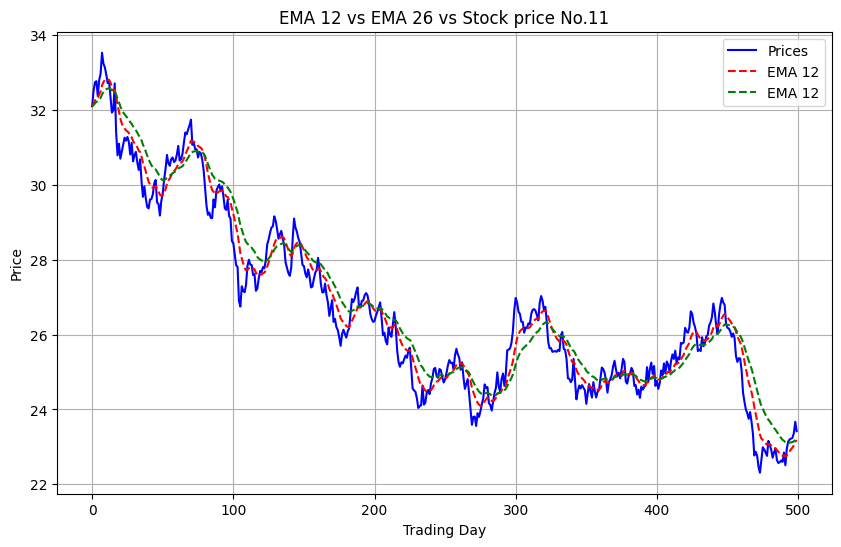

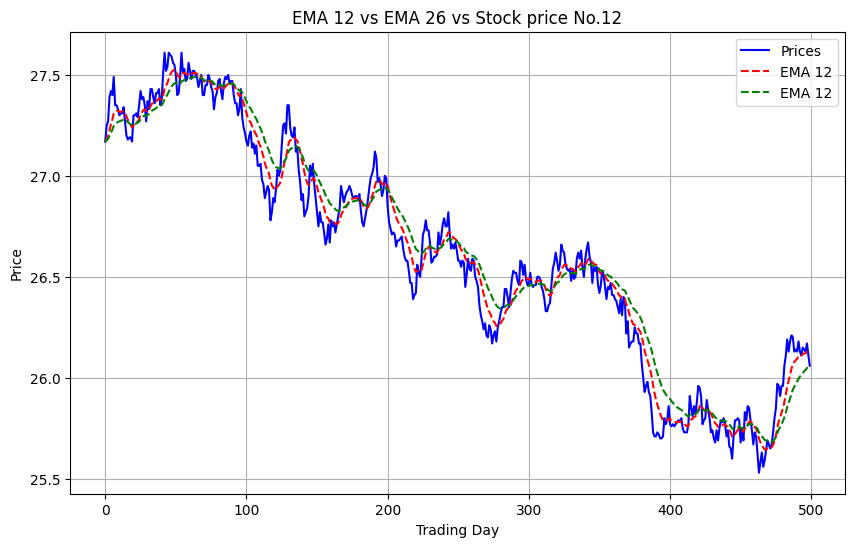

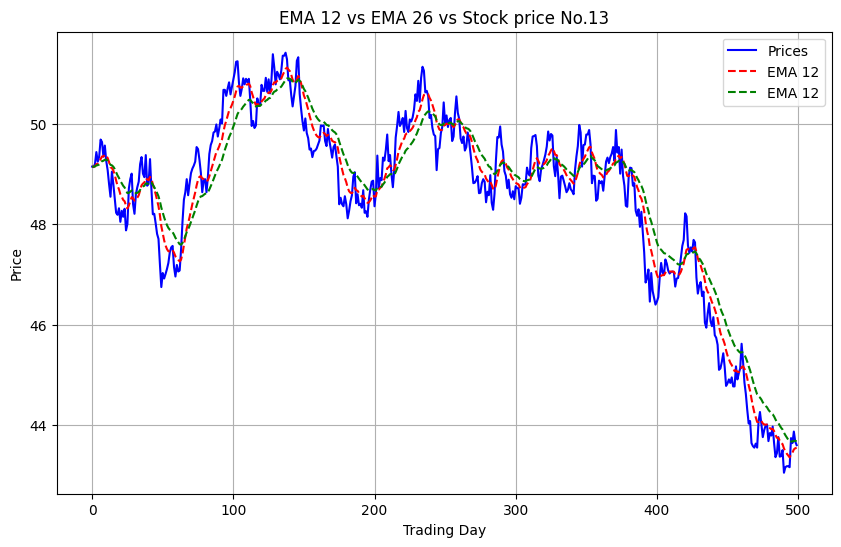

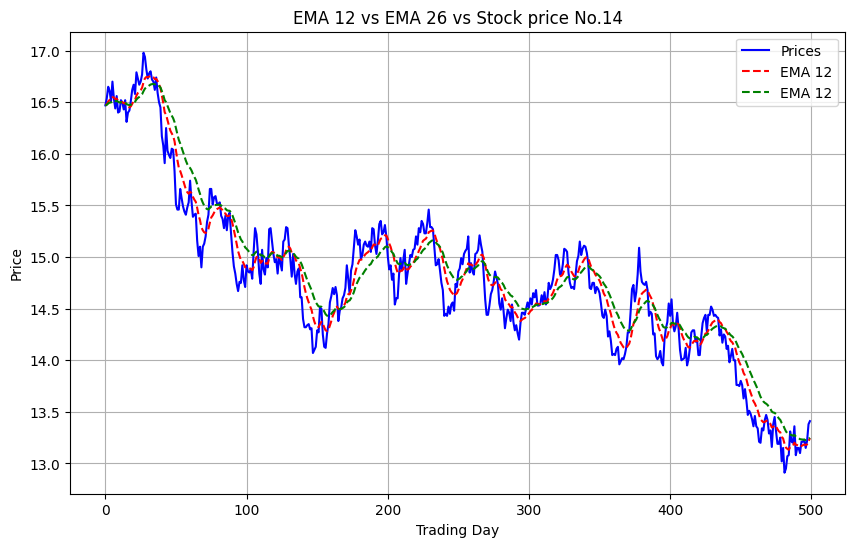

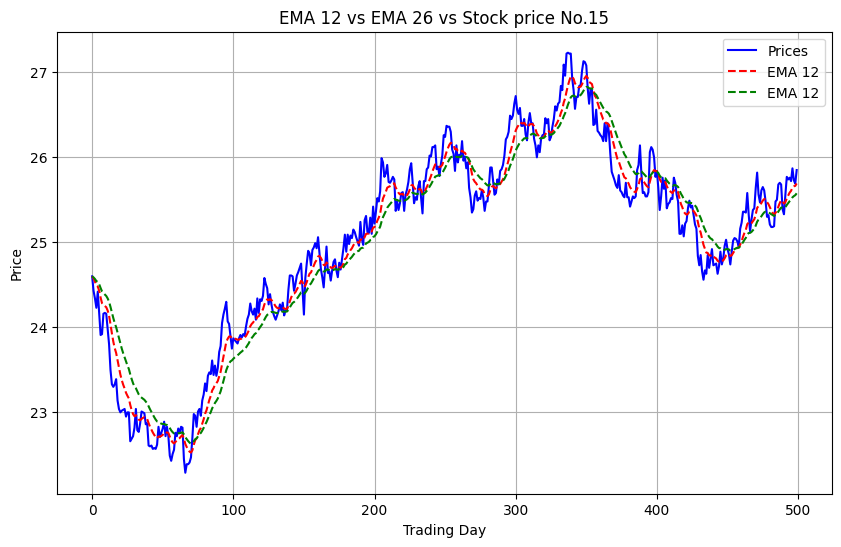

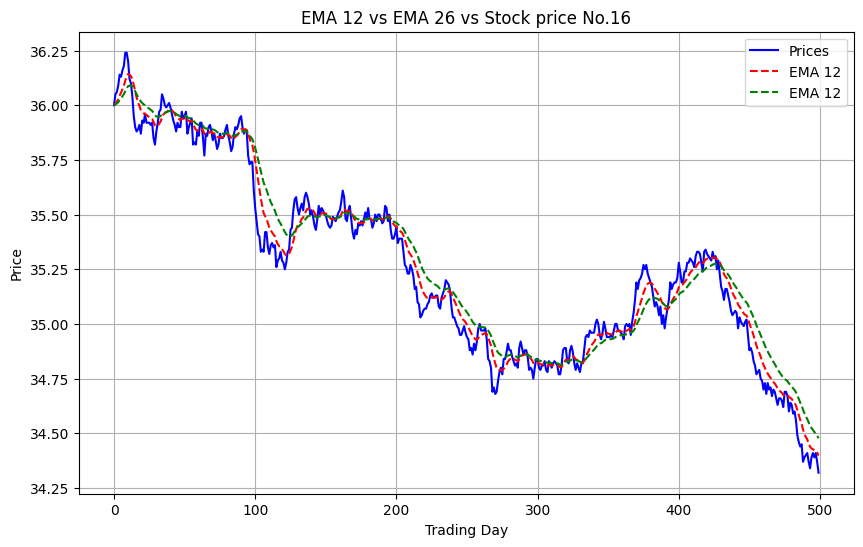

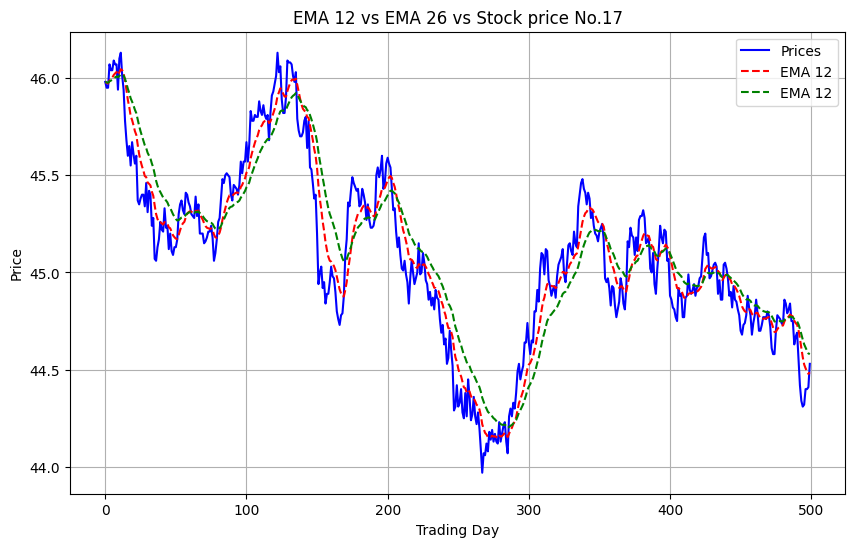

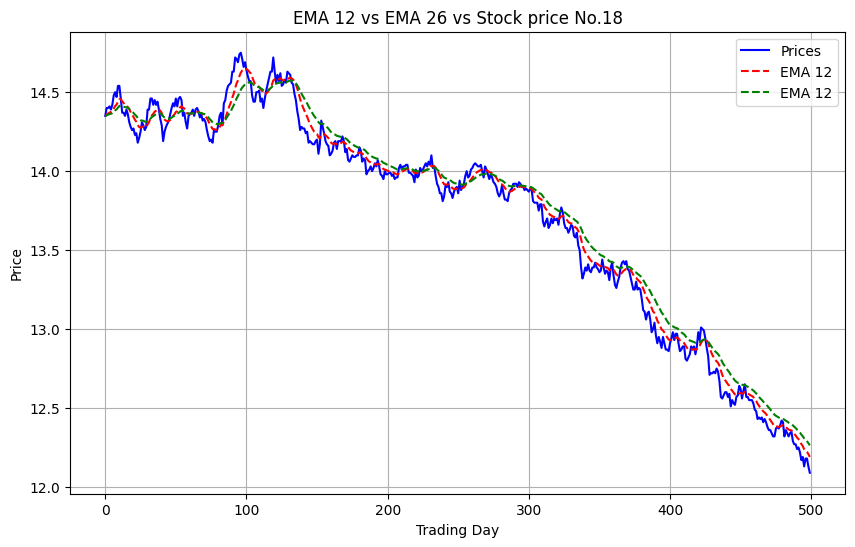

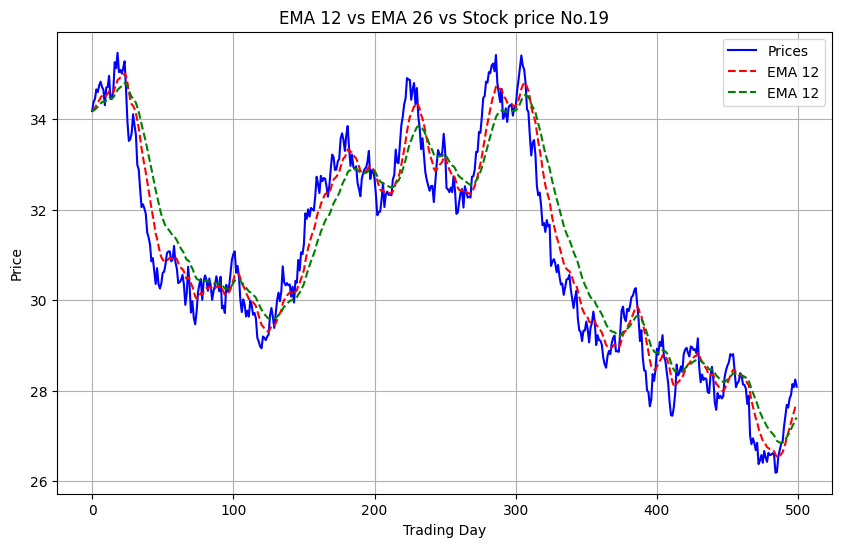

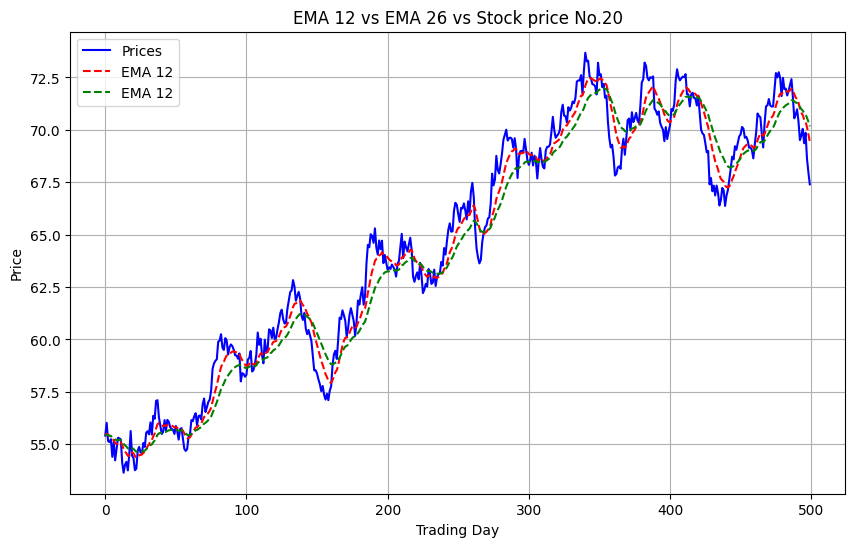

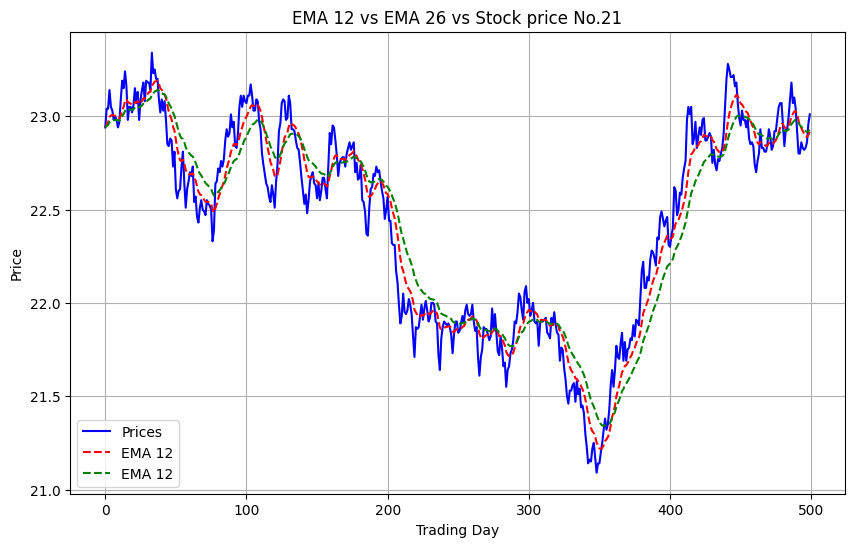

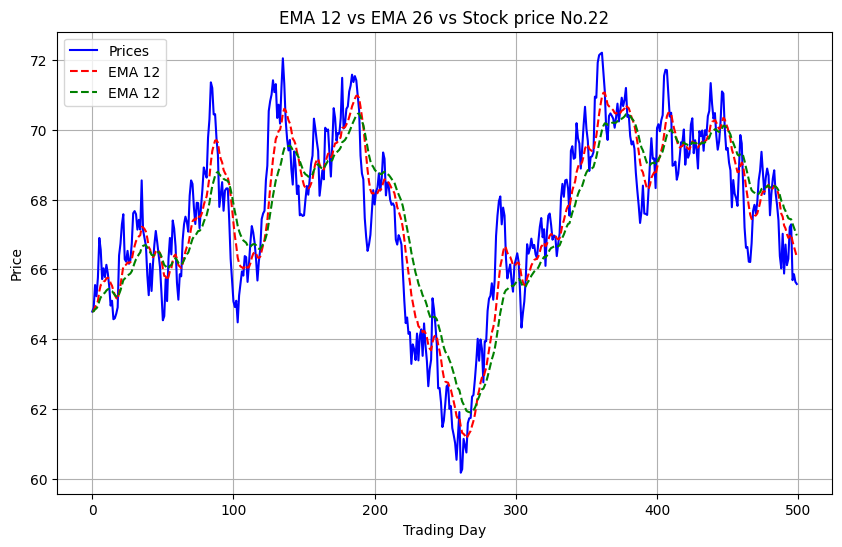

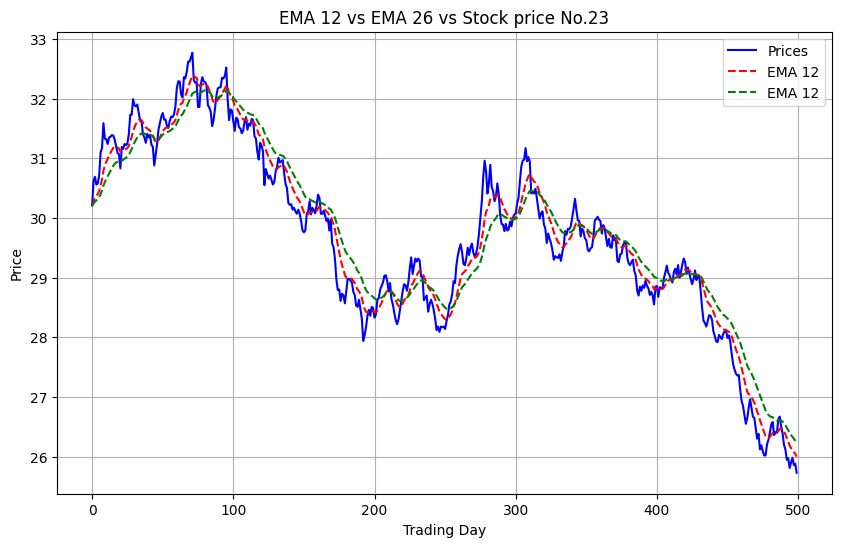

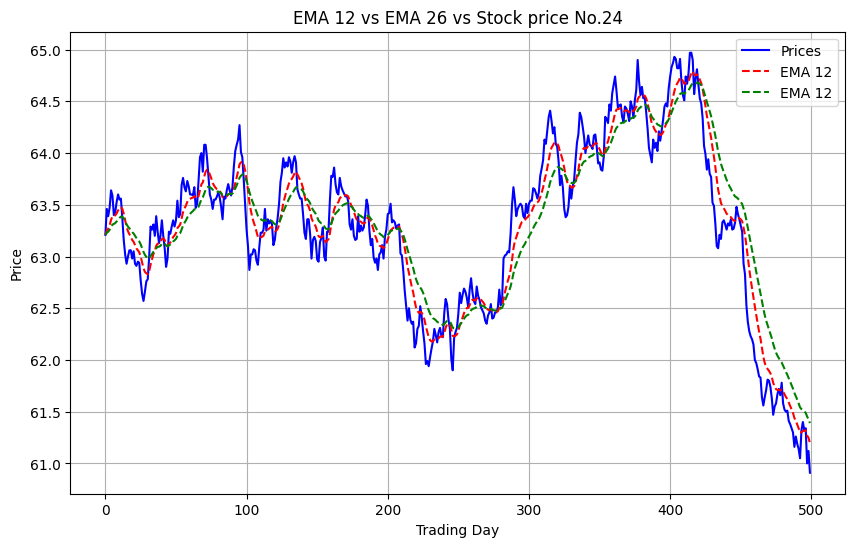

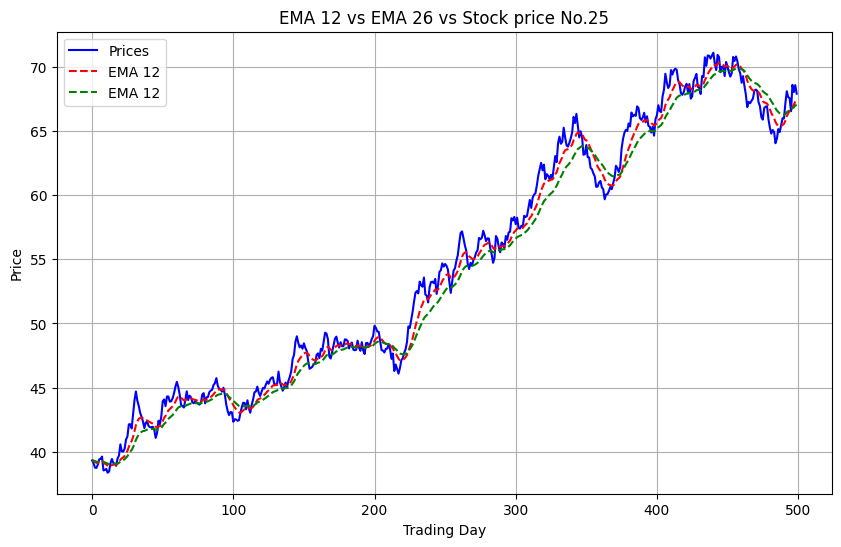

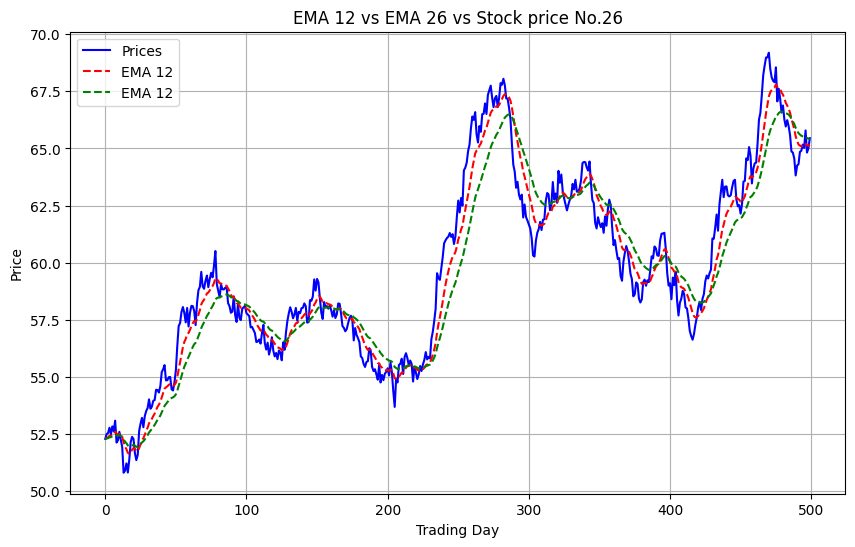

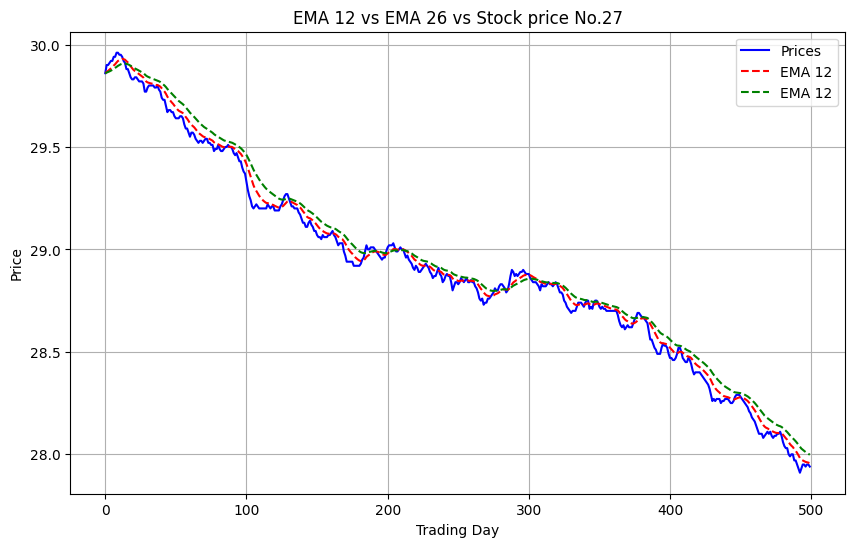

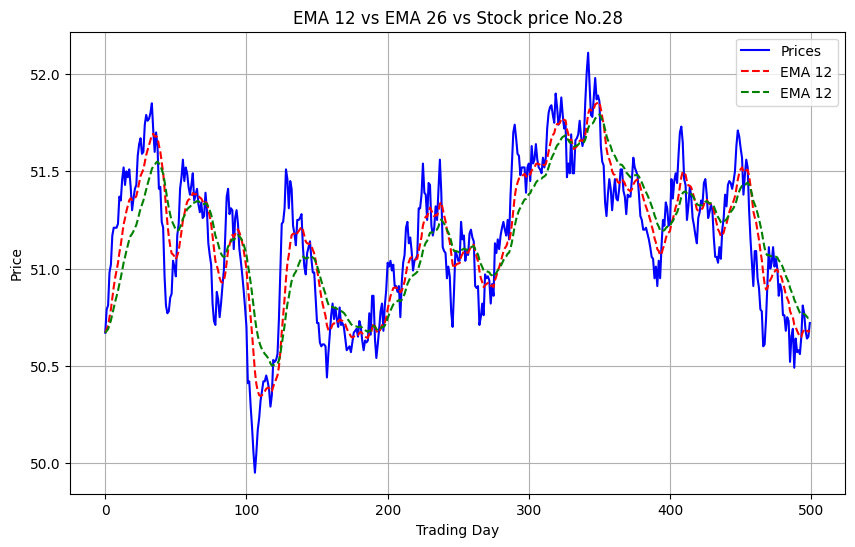

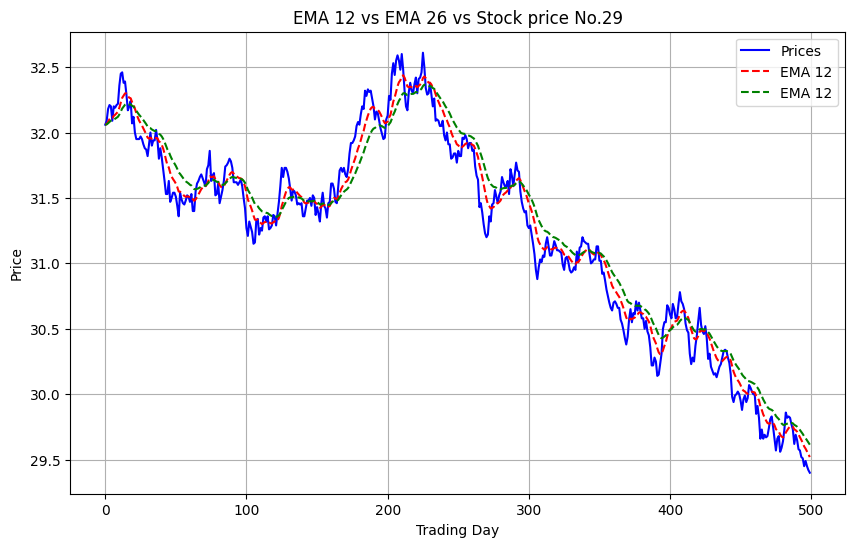

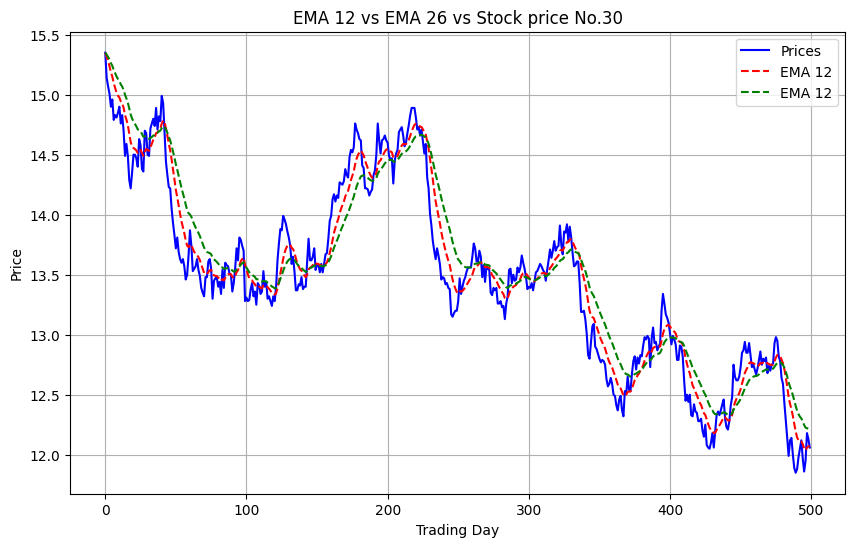

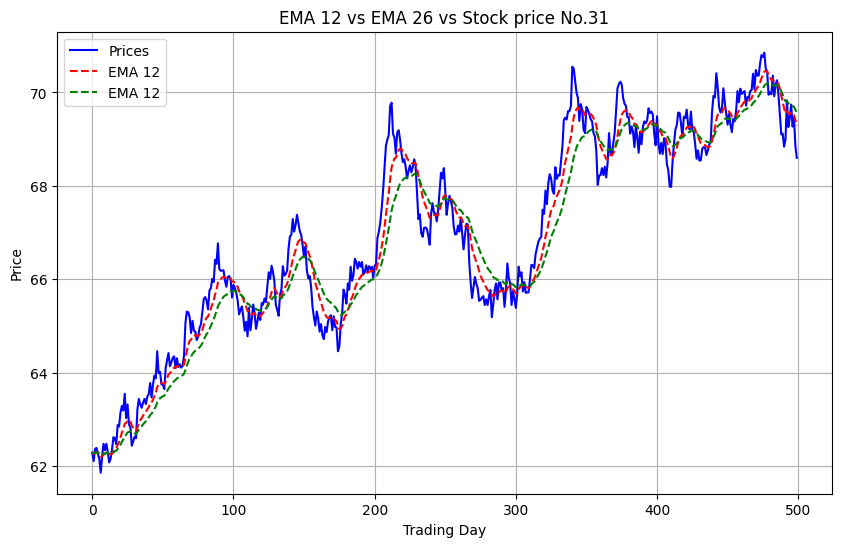

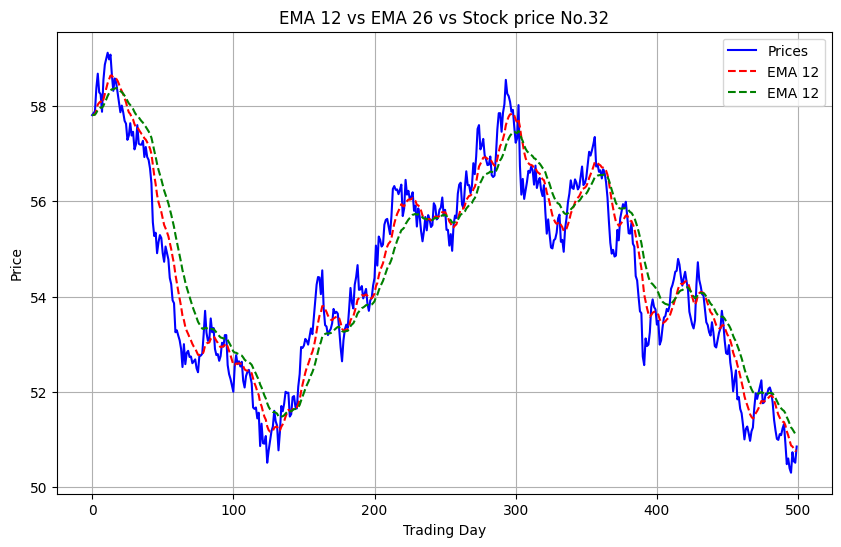

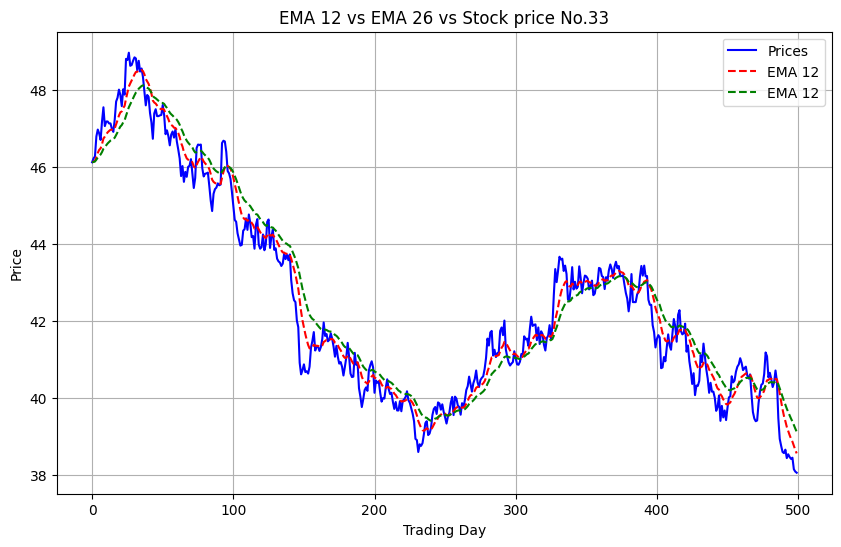

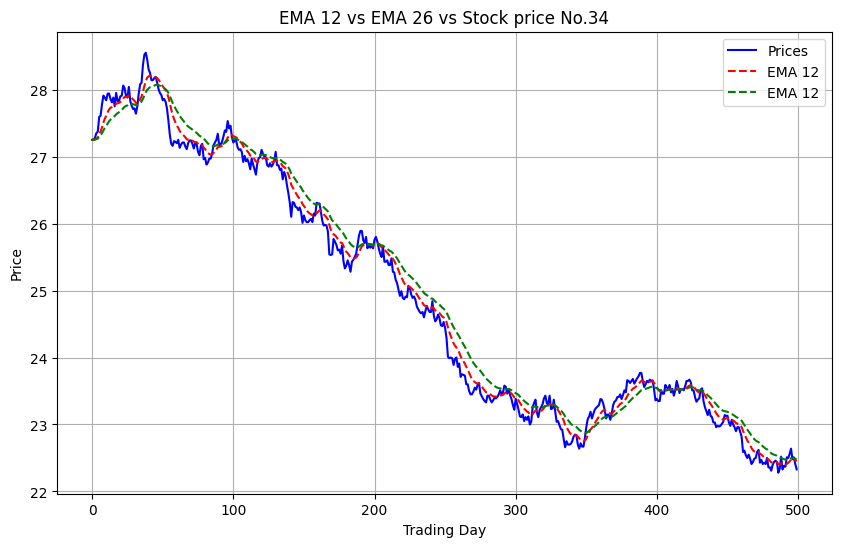

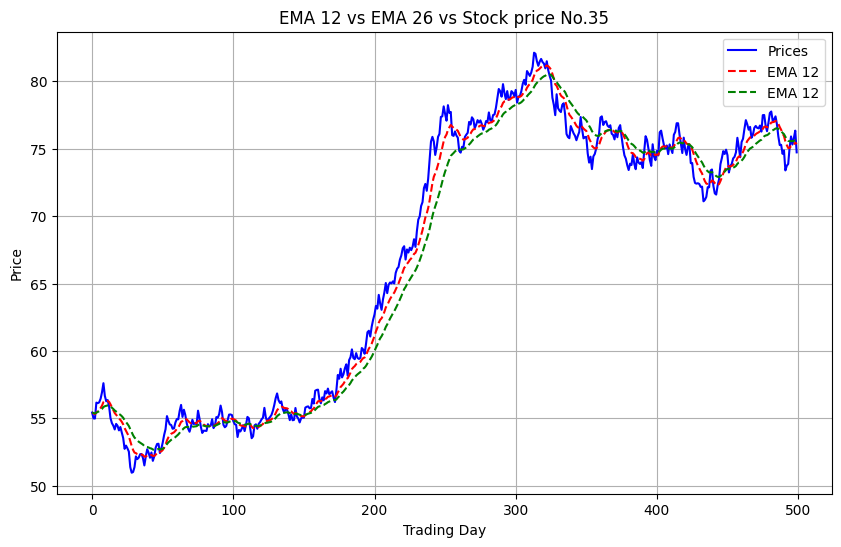

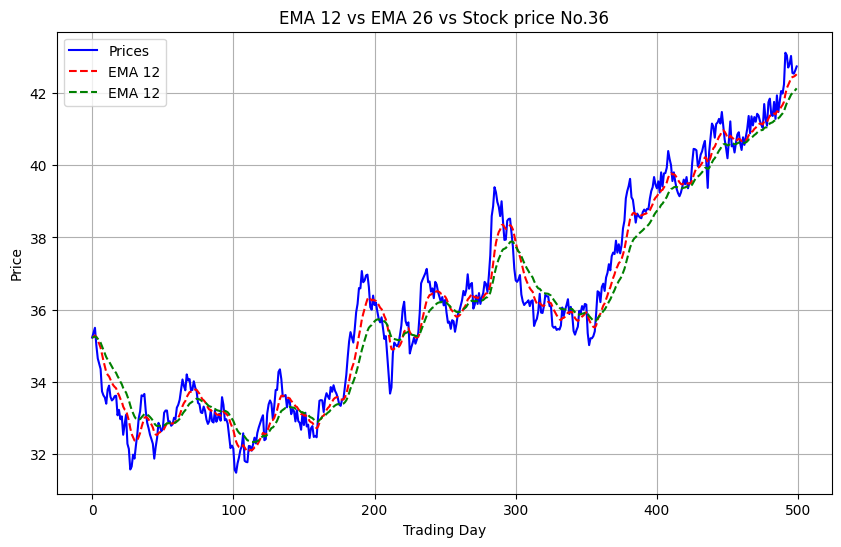

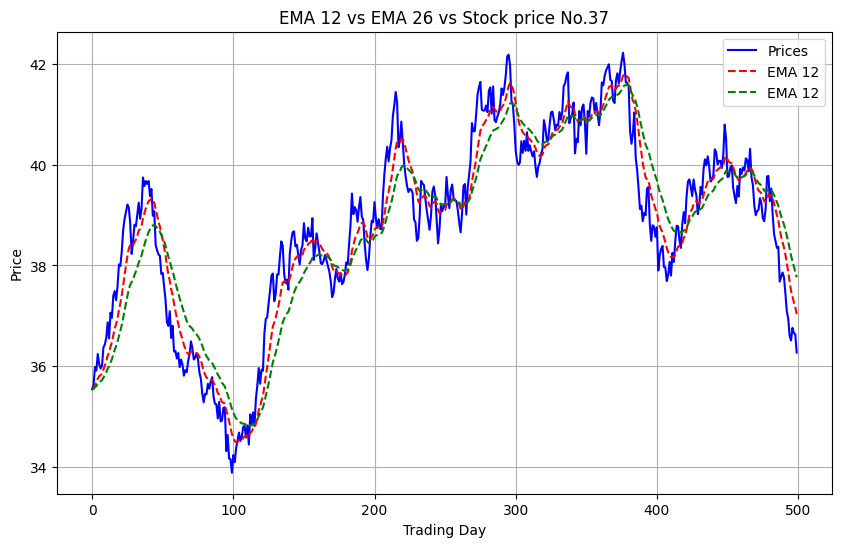

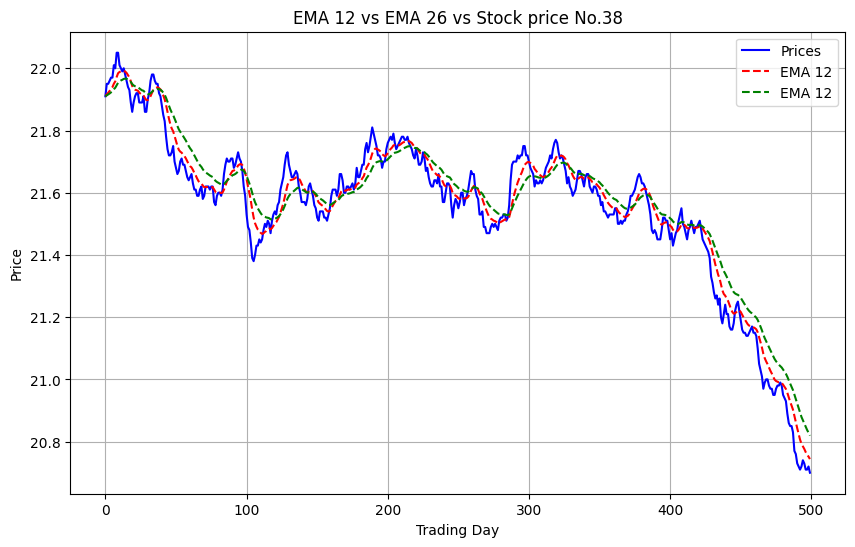

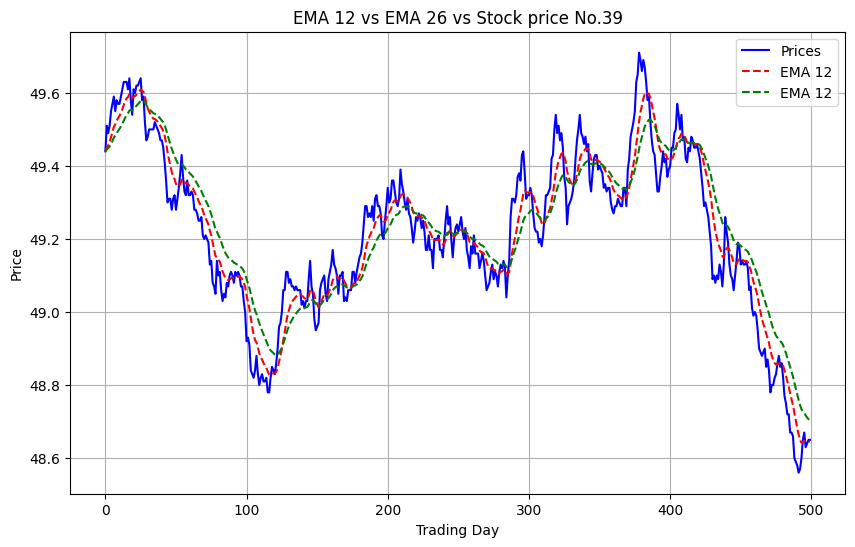

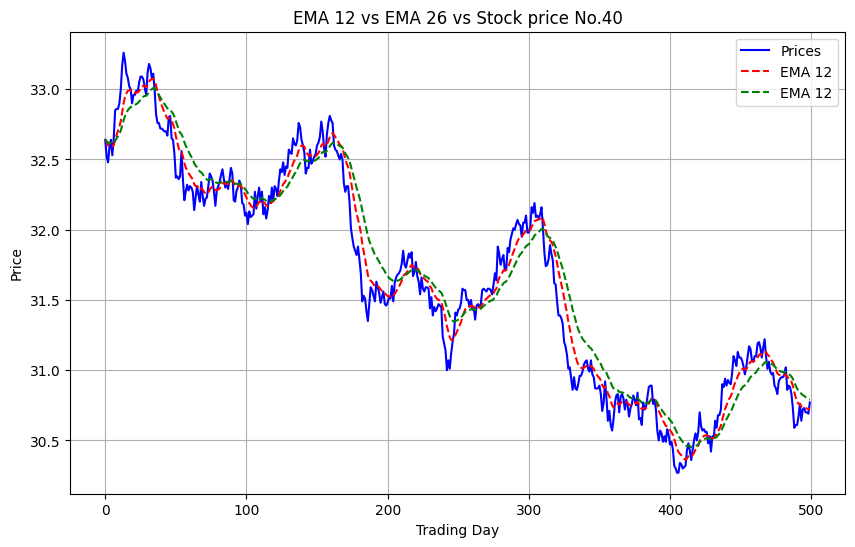

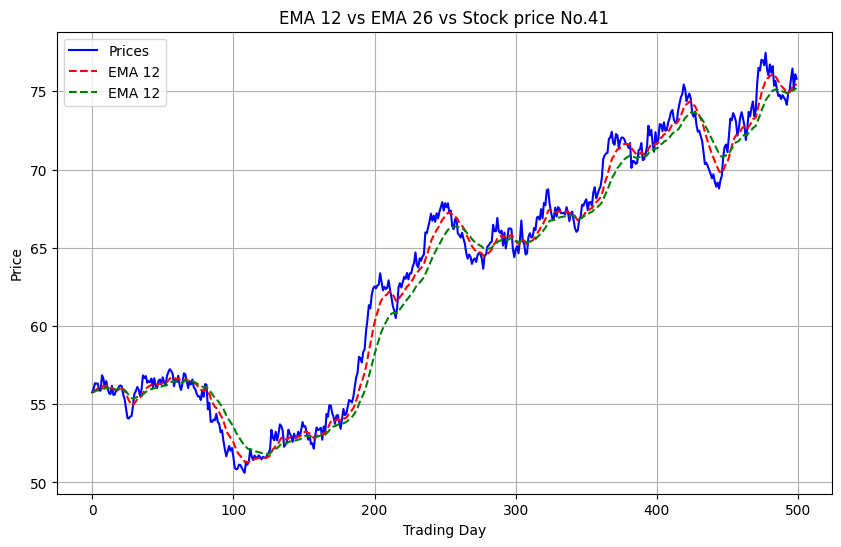

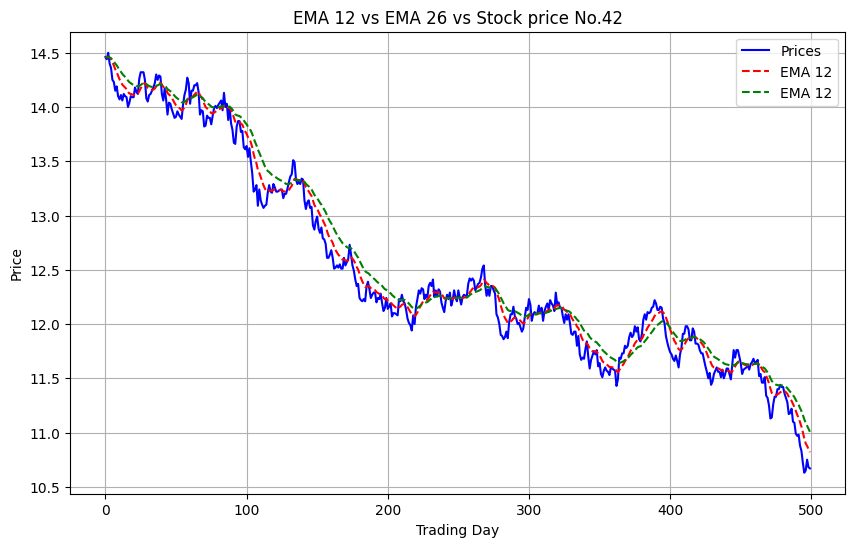

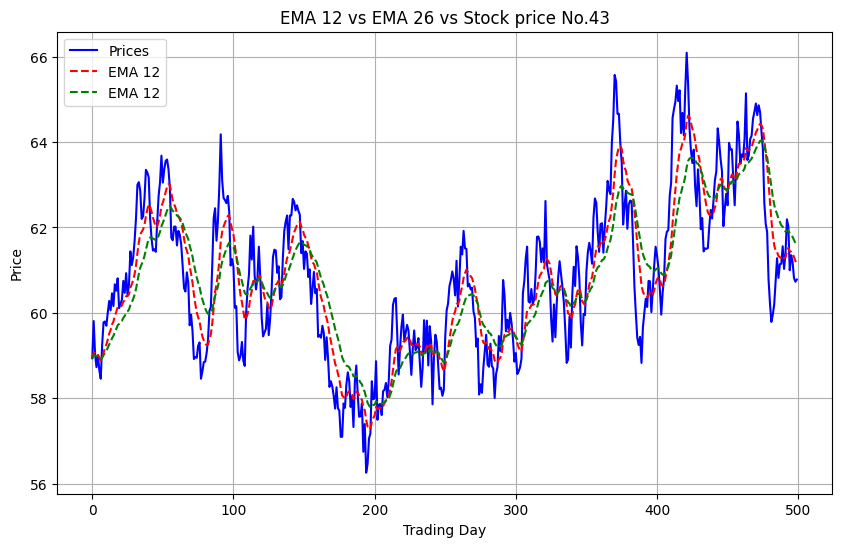

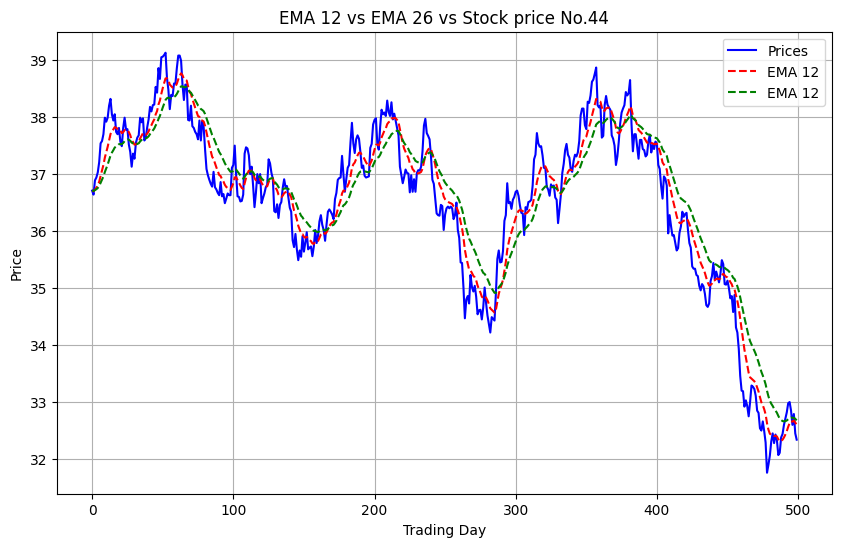

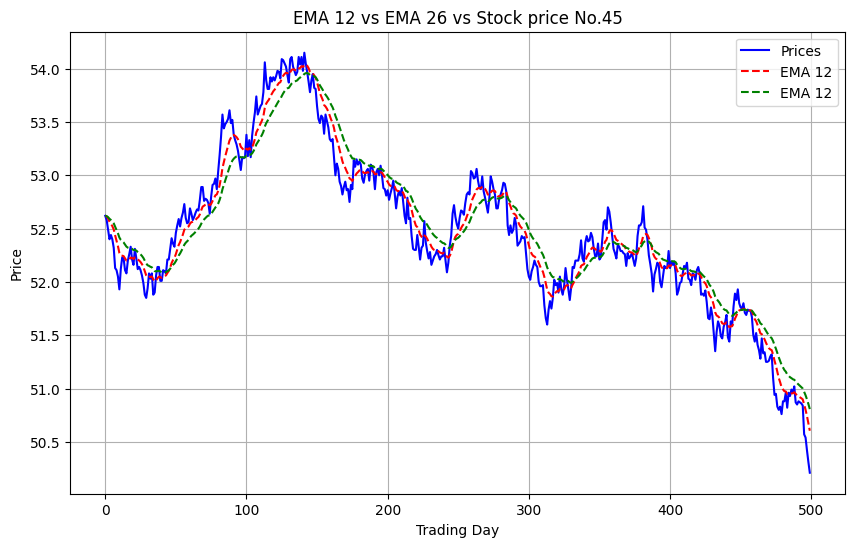

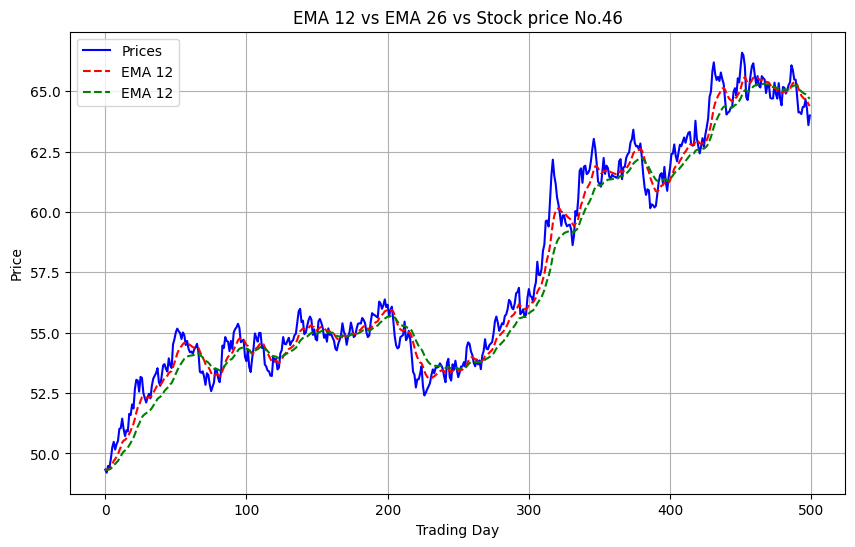

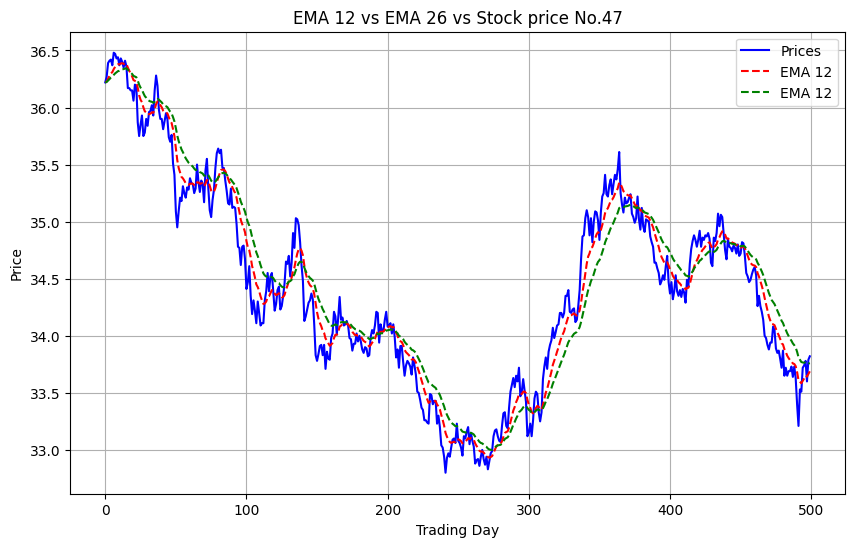

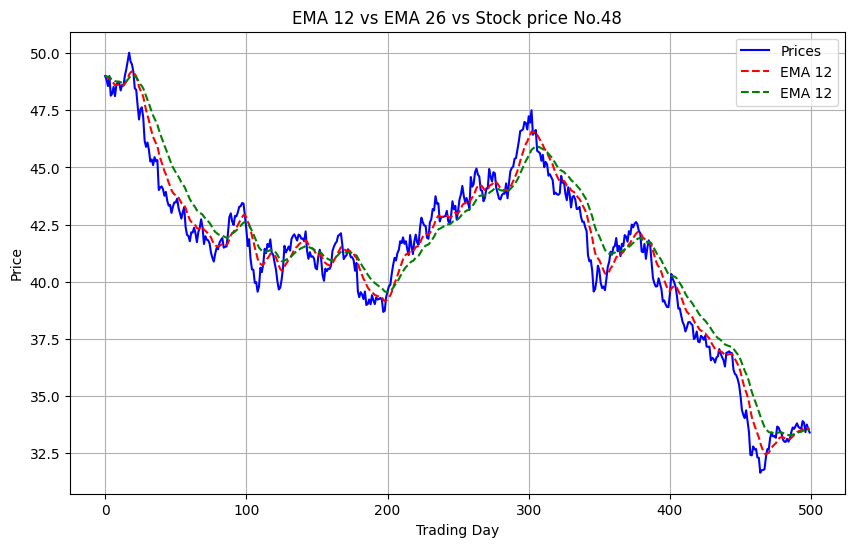

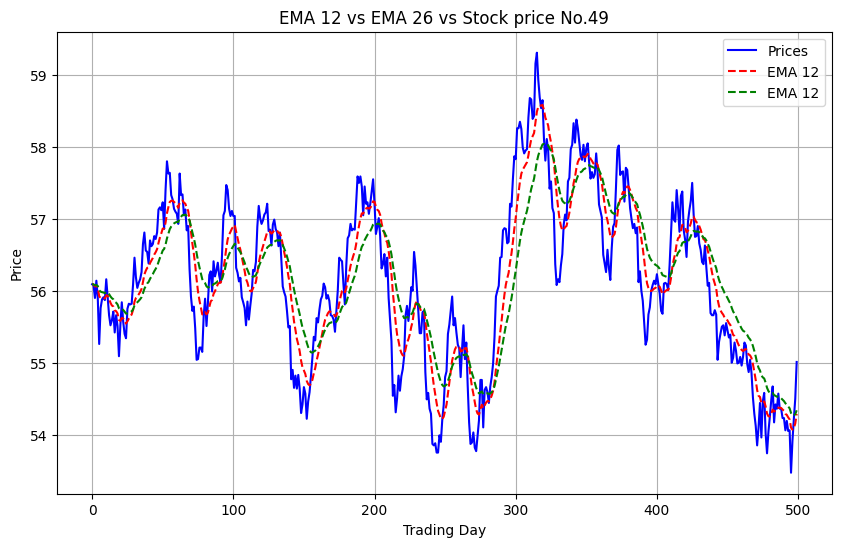

In [62]:
# Plotting
for i in range(SP_matrix.shape[0]):
    plt.figure(figsize=(10, 6))
    plt.plot(SP_matrix[i,:], label='Prices', color='blue')
    plt.plot(EMA_12[i,:], label='EMA 12', linestyle='--', color='red')
    plt.plot(EMA_26[i,:], label='EMA 26', linestyle='--', color='green')
    plt.title('EMA 12 vs EMA 26 vs Stock price No.' + str(i))
    plt.xlabel('Trading Day')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    #plt.savefig('EMA12 of Stock No.2.png')
    plt.show()